In [22]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from colorthief import ColorThief

In [23]:
def create_bar(height, width, color):
    bar = np.zeros((height, width, 3), np.uint8)
    bar[:] = color
    red, green, blue = int(color[2]), int(color[1]), int(color[0])
    return bar, (red, green, blue)


def get_centers(img):
    height, width, _ = np.shape(img)
    data = np.reshape(img, (height * width, 3))
    data = np.float32(data)
    number_clusters = 5
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness, labels, centers = cv2.kmeans(data, number_clusters, None, criteria, 10, flags)
    return centers


In [30]:
def display(indice, centers, img):
    font = cv2.FONT_HERSHEY_SIMPLEX
    bars = []
    rgb_values = []

    for index, row in enumerate(centers):
        bar, rgb = create_bar(200, 200, row)
        bars.append(bar)
        rgb_values.append(rgb)

    img_bar = np.hstack(bars)

    for index, row in enumerate(rgb_values):
        image = cv2.putText(img_bar, f'{index + 1}. RGB: {row}', (5 + 200 * index, 200 - 10),
                            font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
        print(f'{index + 1}. RGB{row}')
    plt.imshow(img)
    plt.show()
    plt.imshow(img_bar)
    plt.show()

In [25]:
def show(img):
    plt.imshow(img)
    plt.show()

In [26]:
path = "media/players/1.jpg"
path2 = "media/players/5.jpg"

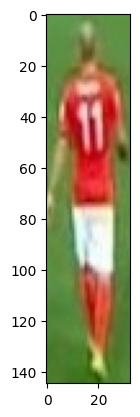

In [27]:
image = cv2.imread(path)
show(image)

In [28]:
hlv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
colors, rep = np.unique(hlv, return_counts=True)
hist = cv2.calcHist([hlv],[0],None,[32],[0,256])

1. RGB(100, 138, 67)
2. RGB(187, 56, 43)
3. RGB(79, 121, 46)
4. RGB(193, 137, 103)
5. RGB(234, 227, 214)


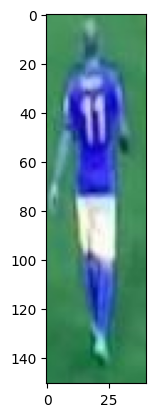

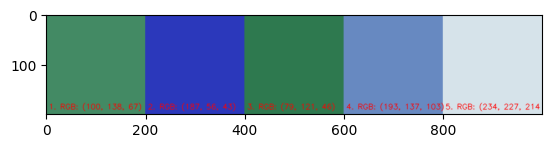

In [31]:
image = cv2.imread('media/players/hol3.jpg')
centers = get_centers(image)
display(1, centers, image)